<a href="https://colab.research.google.com/github/EmelyanovAndreyNSK/PythonTasks/blob/master/CM_Lab4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy.linalg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import tqdm

In [ ]:
A = np.array([[998,1998], [-999, -1999]])

In [ ]:
vals, vectors = scipy.linalg.eig(A)

In [ ]:
print(vals)

[   -1.+0.j -1000.+0.j]


In [ ]:
# Система жесткая
vals[1]/vals[0]

(1000-0j)

In [ ]:
def u(x,a,b):
    return 2*a*math.exp(-x) + b*math.exp(-1000*x)

def v(x,a,b):
    return (-a)*math.exp(-x) + (-b)*math.exp(-1000*x)

In [ ]:
def get_constants_a_b(u_x, v_x, x):
    a = (u_x + v_x)/math.exp(-x)
    b = - (u_x + 2*v_x)/math.exp(-1000*x)
    return a, b

In [ ]:
u_x = 1
v_x = 1
x = 0
x_final = 0.5

a, b = get_constants_a_b(u_x, v_x, x)

In [ ]:
def explicit_solution(h, x, u_begin, v_begin, n, a, b):
    u = []
    v = []
    u.append(u_begin)
    v.append(v_begin)
    
    for i in range(0, n + 1):
        res1 = u[i] + h * (998 * u[i] + 1998 * v[i])
        u.append(res1)
        res2 = v[i] + h * (-999 * u[i] - 1999 * v[i])
        v.append(res2)
    return u,v

In [ ]:
h = 0.001
n = 500
res_u, res_v = explicit_solution(h, x, u_x, v_x, n, a, b)
min(res_v)

-1.9980000000000002

In [ ]:
def implicit_solution(h, x, u_begin, v_begin, n, a, b):
    u = []
    v = []
    u.append(u_begin)
    v.append(v_begin)
    for i in tqdm.tqdm(range(0, n+1)):
        A = (u[i] + v[i]) * (1-h/2)/(1+h/2)
        res_1 = (u[i] + (h/2)*(998* u[i] + 1998 * v[i]) + (h/2) * 1998 * A)/(1+ 500 * h)
        u.append(res_1)
        res_2 = (v[i] + (h/2)*(-999 * u[i] - 1999 * v[i]) - (h/2) * 999 * A)/(1+ 500 * h)
        v.append(res_2)
    return u,v

In [ ]:
h = 0.001
n = 500
lst_u, lst_v = implicit_solution(h, x, u_x, v_x, n, a, b)
min(lst_v)

100%|██████████| 501/501 [00:00<00:00, 185614.90it/s]


-1.9846771425954597

In [ ]:
def plot_exp_u(res_u, res_v):
    plt.subplot(111)
    plt.plot(np.linspace(x, x_final, 5000), [2*a*math.exp(-i) + b*math.exp(-1000*i) for i in np.linspace(x, x_final, 5000)])
    plt.plot(np.linspace(x, x_final, len(res_u)), res_u)

def plot_exp_v(res_u, res_v):
    plt.subplot(111)
    plt.plot(np.linspace(x, x_final, 5000), [(-a)*math.exp(-i) + (-b)*math.exp(-1000*i) for i in np.linspace(x, x_final, 5000)])
    plt.plot(np.linspace(x, x_final, len(res_v)), res_v)

def plot_imp_u(lst_u, lst_v):
    plt.subplot(111)
    plt.plot(np.linspace(x, x_final, 5000), [2*a*math.exp(-i) + b*math.exp(-1000*i) for i in np.linspace(x, x_final, 5000)])
    plt.plot(np.linspace(x, x_final, len(lst_u)), lst_u)

def plot_imp_v(lst_u, lst_v):
    plt.subplot(111)
    plt.plot(np.linspace(x, x_final, 5000), [(-a)*math.exp(-i) + (-b)*math.exp(-1000*i) for i in np.linspace(x, x_final, 5000)])
    plt.plot(np.linspace(x, x_final, len(lst_v)), lst_v)

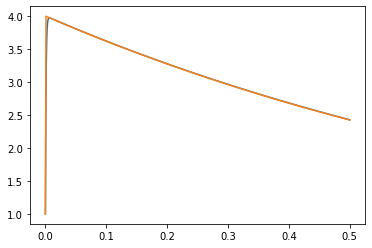

In [ ]:
plot_exp_u(res_u, res_v)


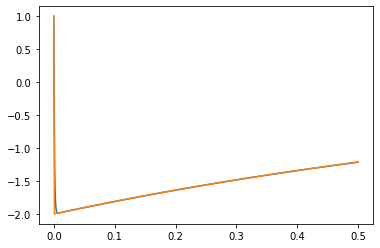

In [ ]:
plot_exp_v(res_u, res_v)


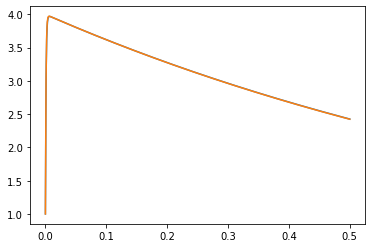

In [ ]:
plot_imp_u(lst_u, lst_v)


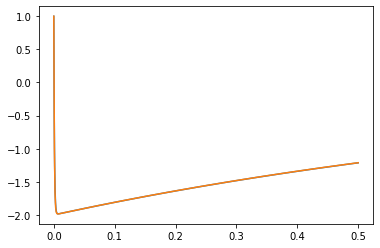

In [ ]:
plot_imp_v(lst_u, lst_v)

In [ ]:
h = 0.005
n = 100
res_u, res_v = explicit_solution(h, x, u_x, v_x, n, a, b)
min(res_v)

-1.9283256531107903e+61

In [ ]:
h = 0.005
n = 100
lst_u, lst_v = implicit_solution(h, x, u_x, v_x, n, a, b)
min(lst_v)

100%|██████████| 101/101 [00:00<00:00, 27357.10it/s]


-3.275739223370146

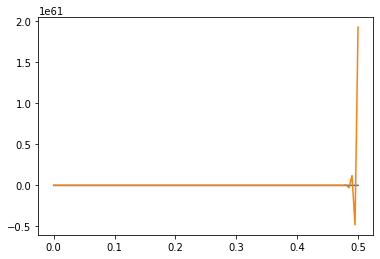

In [ ]:
plot_exp_u(res_u, res_v)


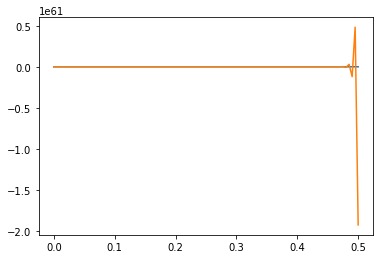

In [ ]:
plot_exp_v(res_u, res_v)


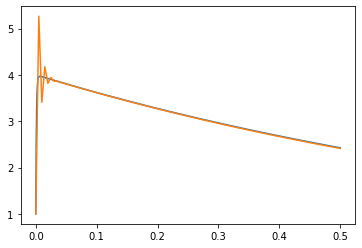

In [ ]:
plot_imp_u(lst_u, lst_v)


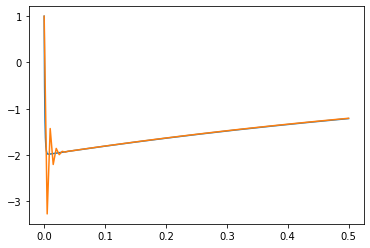

In [ ]:
plot_imp_v(lst_u, lst_v)

In [ ]:
def all_solution(u_x, v_x, h, x, x_final, n):
    a, b = get_constants_a_b(u_x, v_x, x)
    res_u, res_v = explicit_solution(h, x, u_x, v_x, n, a, b)
    lst_u, lst_v = implicit_solution(h, x, u_x, v_x, n, a, b)
    t = []
    r = []
    maks, mas = get_difference(res_u, u, a, b, u_x, v_x, h, x, x_final)
    t.append(maks)
    r.append(mas)
    maks, mas = get_difference(res_v, v, a, b, u_x, v_x, h, x, x_final)
    t.append(maks)
    r.append(mas)
    maks, mas = get_difference(lst_u, u, a, b, u_x, v_x, h, x, x_final)
    t.append(maks)
    r.append(mas)
    maks, mas = get_difference(lst_v, v, a, b, u_x, v_x, h, x, x_final)
    t.append(maks)
    r.append(mas)
    return t, r

In [ ]:
def get_difference(res, f, a, b, u_x, v_x, h, x, x_final):
    k = [x+ i*h for i in range(len(res))]
    return np.max([abs(res[i] - f(k[i],a,b)) for i in range(len(k))]), np.array([abs(res[i] - f(k[i],a,b)) for i in range(len(k))])

In [ ]:
r1, arr1 = all_solution(1,1,0.00005,0,0.5, int((x_final - x)/0.00005))

100%|██████████| 10001/10001 [00:00<00:00, 510853.89it/s]


In [ ]:
r2, arr2 = all_solution(1,1,0.000025,0,0.5, int((x_final - x)/0.000025))

100%|██████████| 20001/20001 [00:00<00:00, 474771.78it/s]


In [ ]:
for i in range(len(r1)):
    print(r1[i]/r2[i])

2.0214152193466672
2.0214151810406724
4.00081280681826
4.000812806975202
